<a href="https://colab.research.google.com/github/hayaboy/ADP_Practical_Exam/blob/main/%ED%99%95%EB%A5%A0%ED%86%B5%EA%B3%84_%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 확률기본용어

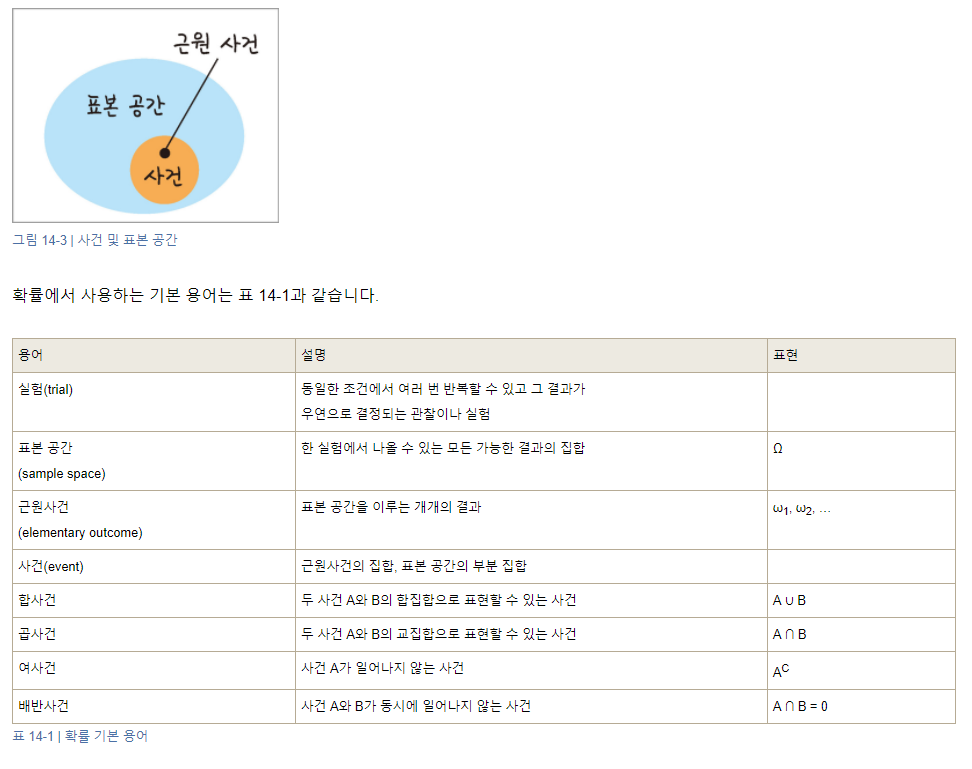

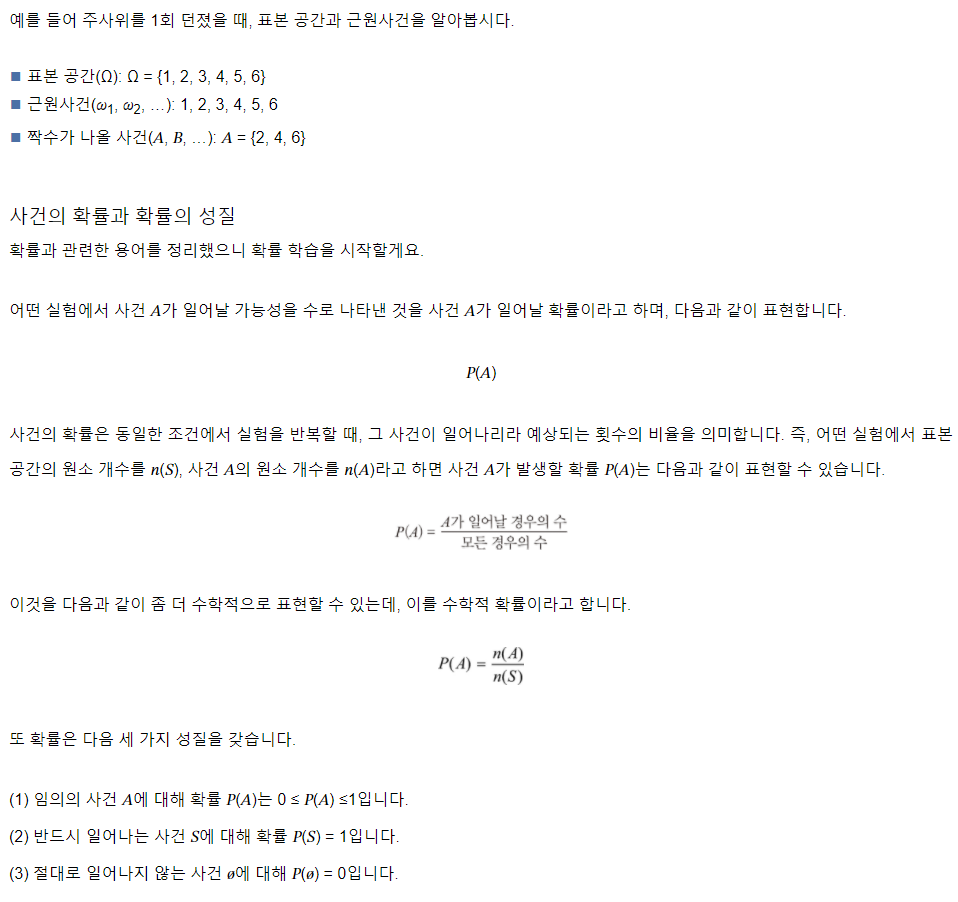

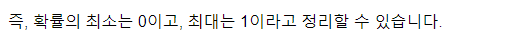

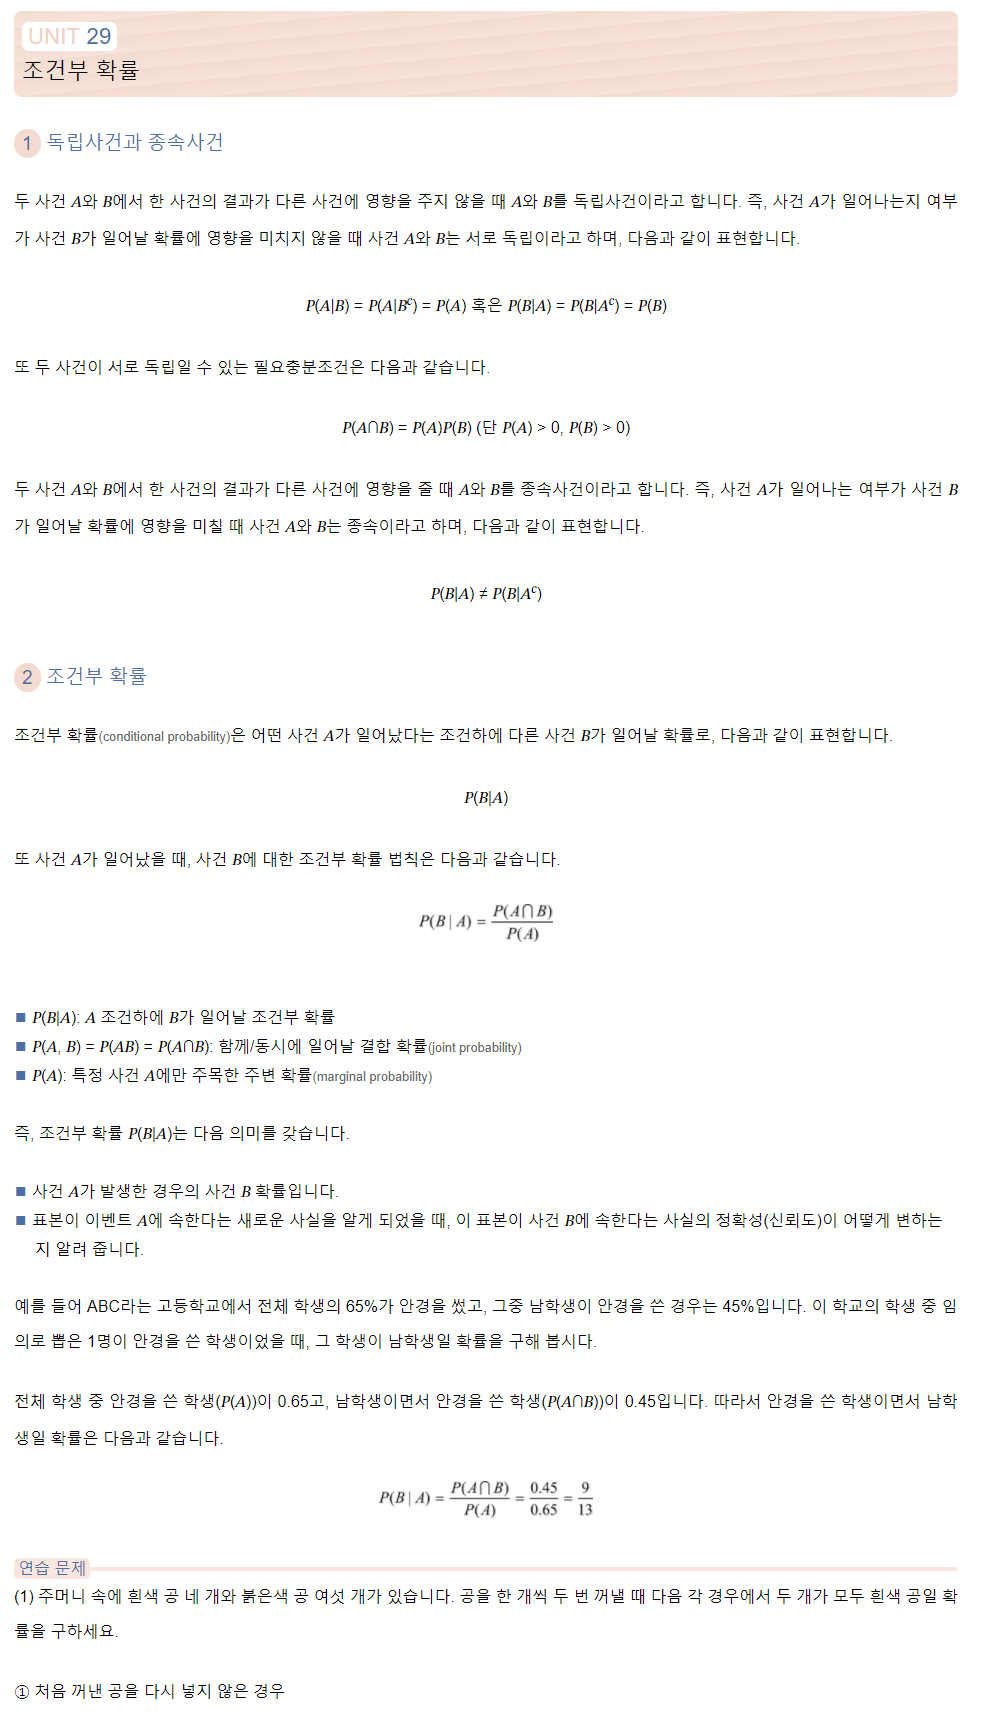

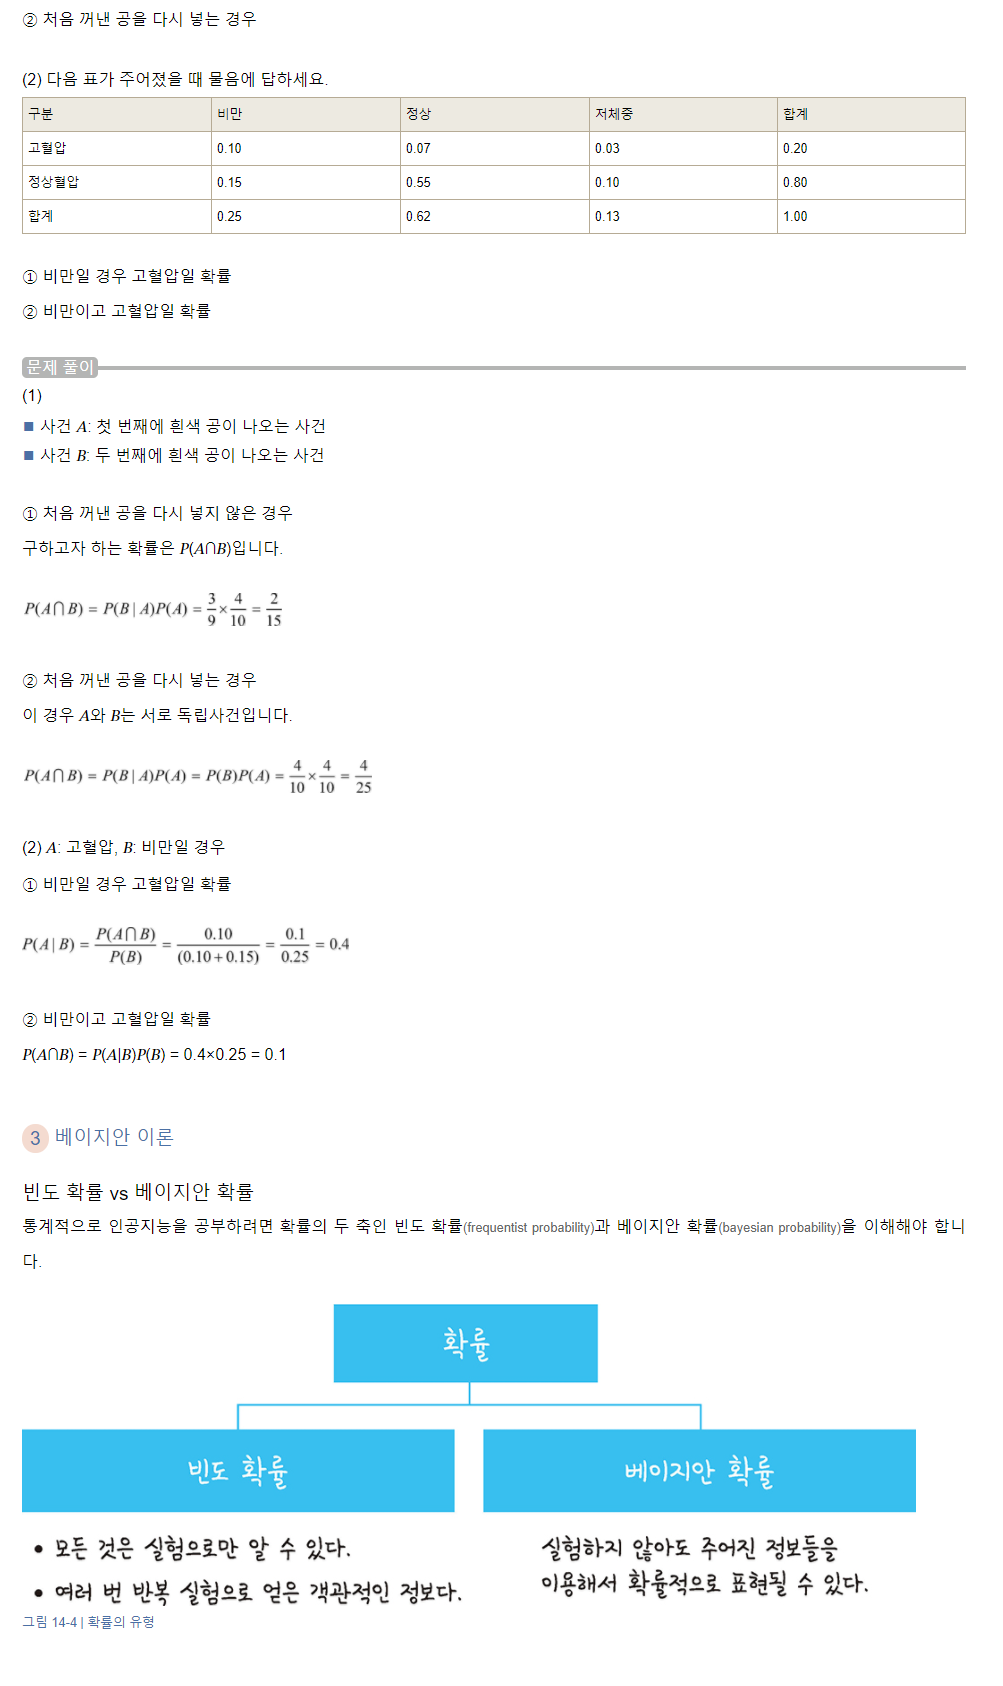

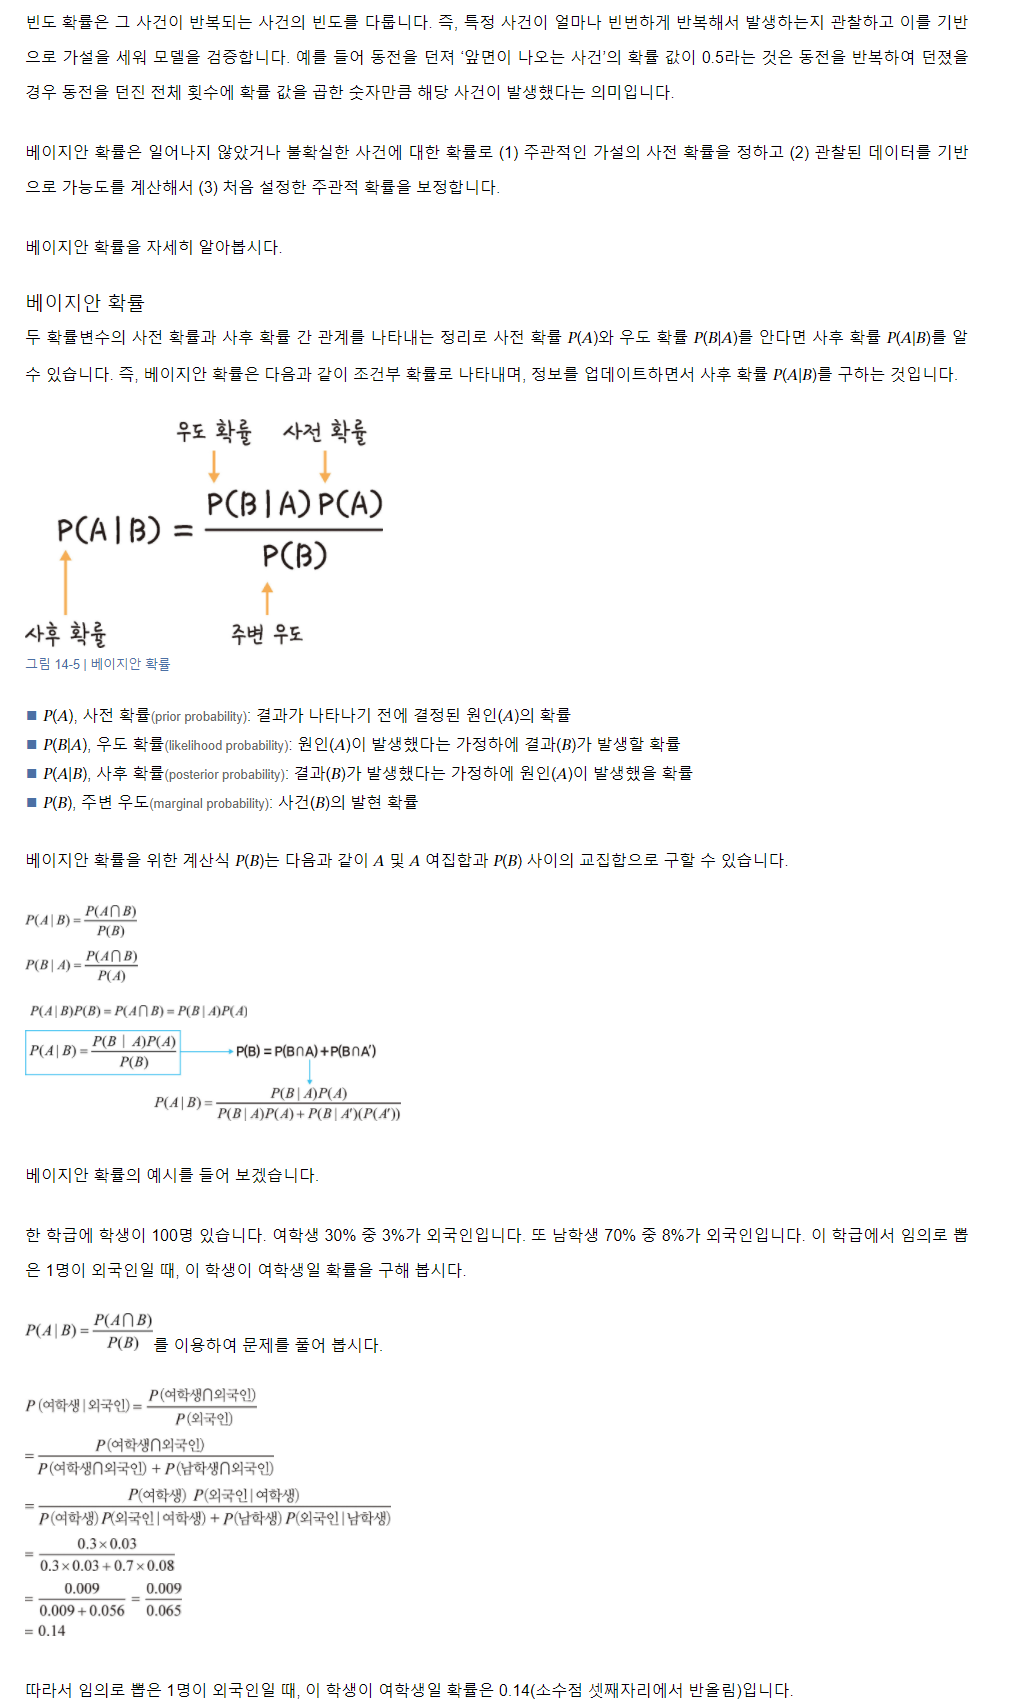

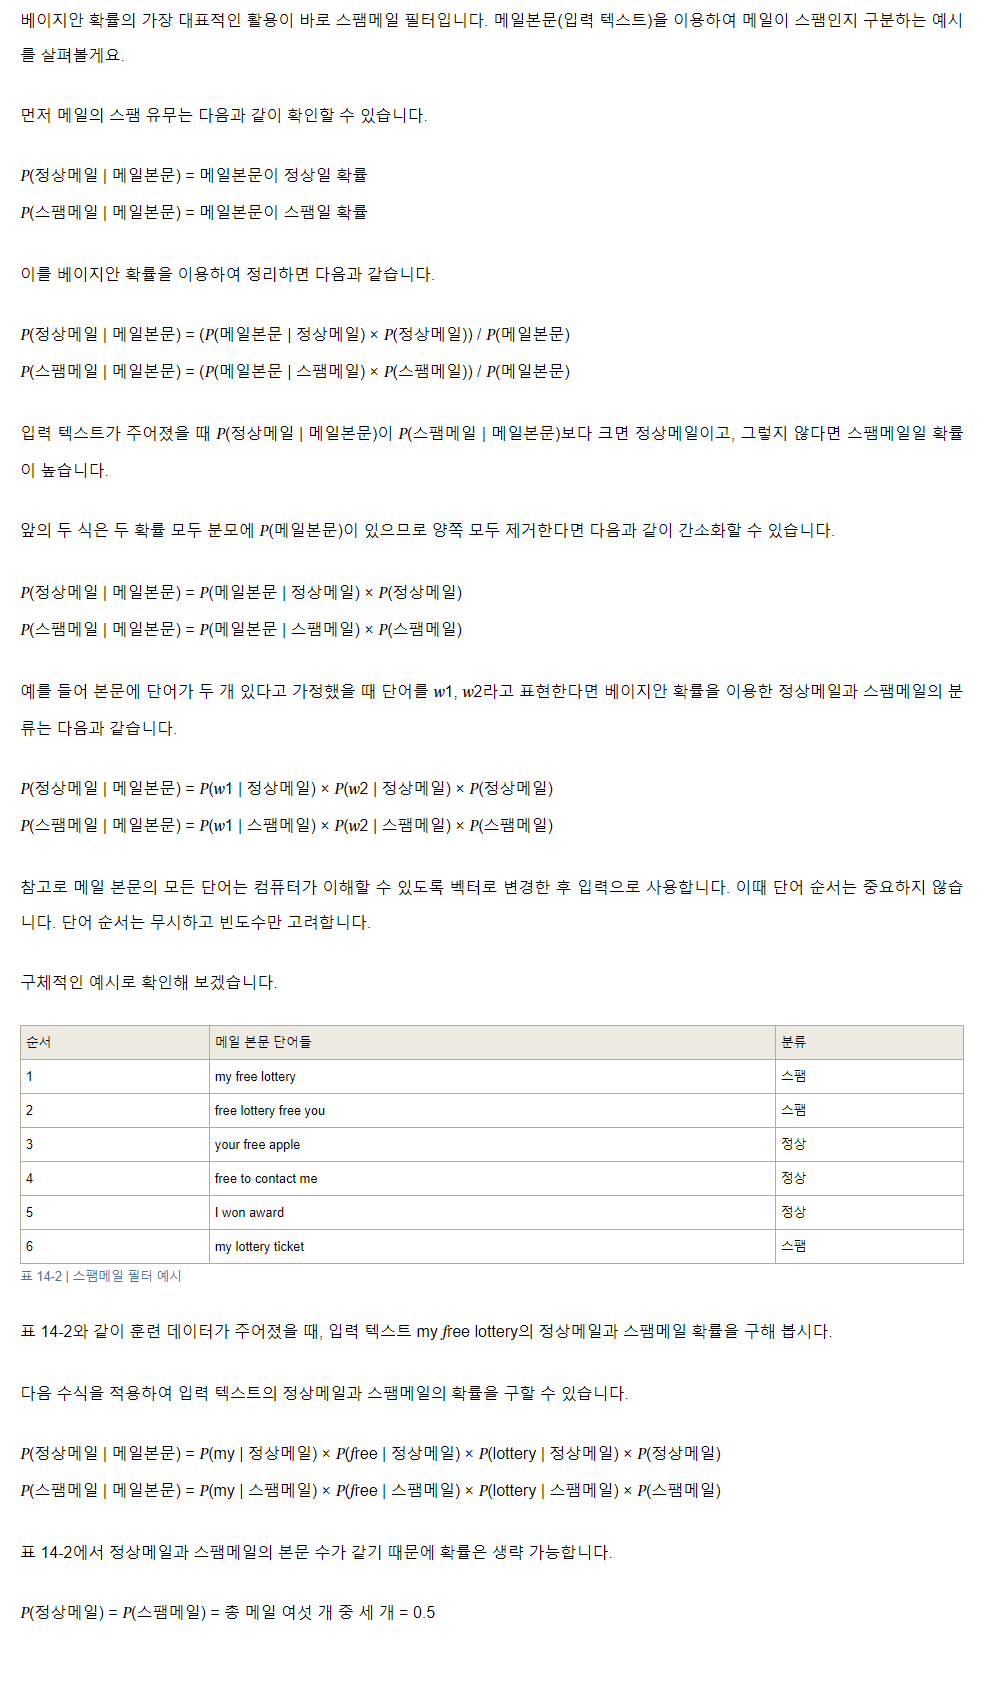

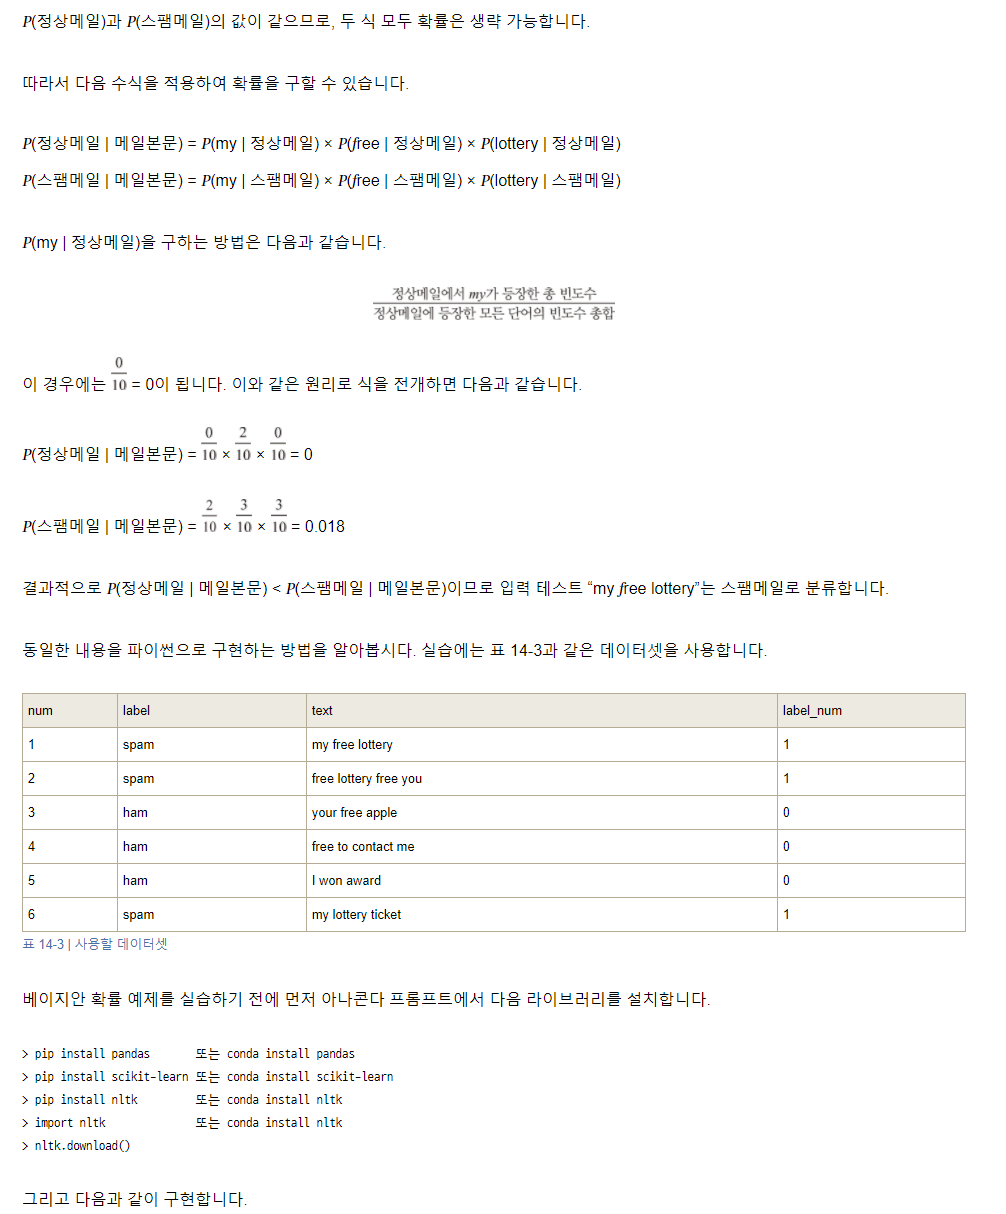

In [2]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk


In [3]:
%pwd

'/content'

In [7]:
# https://github.com/gilbutITbook/080246 참조

In [4]:
df=pd.read_csv('./spam.csv')

In [5]:
df

,num,label,text,label_num
0,1,spam,my free lottery,1
1,2,spam,free lottery free you,1
2,3,ham,you free apple,0
3,4,ham,free to contact me,0
4,5,ham,I won award,0
5,6,spam,my lottery ticket,1


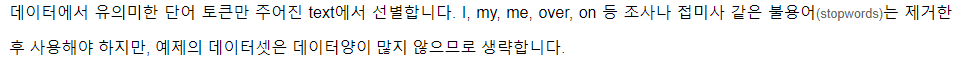

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# 텍스트를 정리하고 토큰을 반환하는 함수 생성
def process_text(text):
    # text에서 구두점 삭제
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # text에서 무의미한 단어(접미사, 조사 등) 삭제
    cleaned_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return cleaned_words

In [14]:
# process_text 함수를 적용하여 데이터 세트의 텍스트 데이터를 토큰화
df['text'].head().apply(process_text)


,text
0,"[free, lottery]"
1,"[free, lottery, free]"
2,"[free, apple]"
3,"[free, contact]"
4,[award]


In [15]:
# text를 토큰 수의 행렬로 변환
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

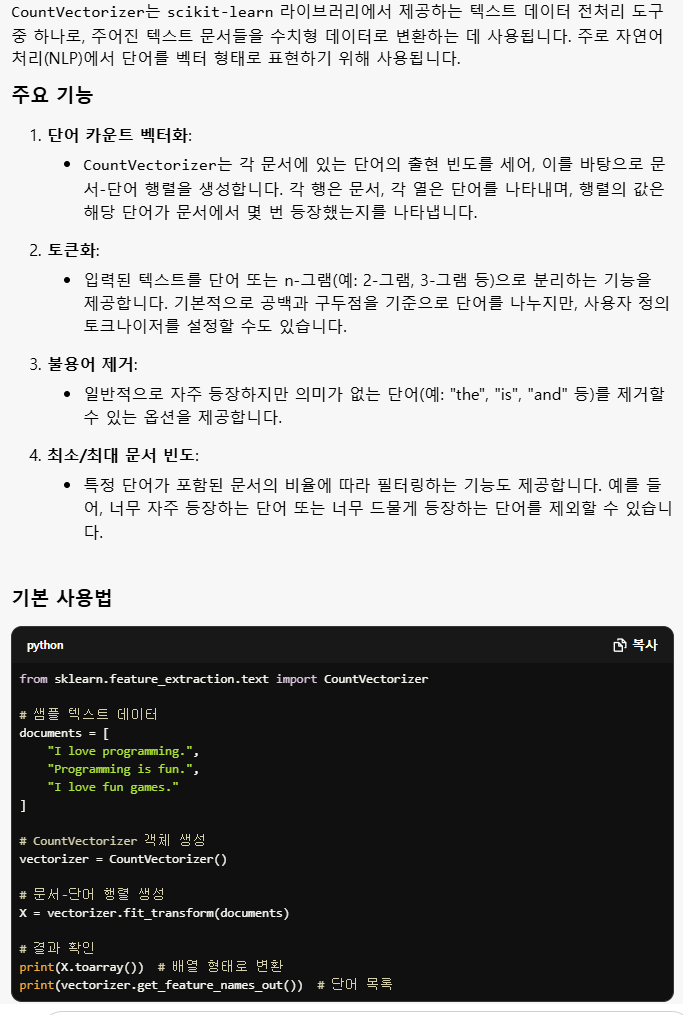

In [16]:
messages_bow

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [20]:
messages_bow.toarray()

array([[0, 0, 0, 1, 1, 0],
       [0, 0, 0, 2, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1]])

In [21]:
#데이터를 80%의 training과 20%의 testing 데이터 셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label_num'], test_size = 0.20, random_state = 0)

In [ ]:
# 다항식 나이브베이즈 모델을 만들고 훈련

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [23]:
# 데이터셋 분류에 대한 예측 및 실제 관측 값을 보여 줍니다.

In [24]:
print(classifier.predict(X_train)) # 예측값 출력
print(y_train.values) #실제 관측 값 출력

[1 0 1 0]
[1 0 1 0]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [26]:
# 혼동행렬로 표현

In [27]:
print(confusion_matrix(y_train,pred))

[[2 0]
 [0 2]]


In [31]:
# 훈련세트에서는 100% 정확도이나 테스트세트에서는 50%

In [28]:
print(accuracy_score(y_train,pred))

1.0


In [29]:
# 테스트 데이터셋(X_test & y_test)에서 모델의 정확도를 테스트
print('Predicted value: ',classifier.predict(X_test))

Predicted value:  [1 1]


In [30]:
print('Actual value: ',y_test.values)

Actual value:  [1 0]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix: 
 [[0 1]
 [0 1]]

Accuracy:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


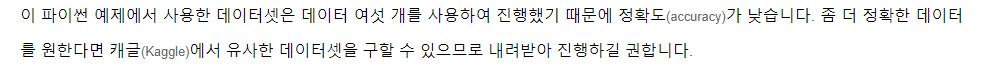

In [ ]:
# z값이 1.5일 경우 p값

In [ ]:
import scipy.stats as stats

# z값
z_value = 1.5

# p값 계산 (우측 꼬리에 대한 p값)
p_value = 1 - stats.norm.cdf(z_value)

print(f"z값: {z_value}, p값: {p_value}")

z값: 1.5, p값: 0.06680720126885809
